# Project: Image Classification using Pipeline dan Gradio

**Description:**

Welcome to your new assignment! In this project, you will have the opportunity to apply the knowledge and skills you've learned in class. The task at hand is to create an image classification project that predicts a person's age based on their photograph. You will be utilizing the power of machine learning pipelines to streamline your workflow and effectively manage the different stages of this project, from data preprocessing to model training and evaluation.

Remember, the goal of this assignment is not just to build a model that makes accurate predictions, but also to understand the process of developing a machine-learning pipeline and the role each component plays in this process.

We encourage you to be creative, explore different strategies, and most importantly, have fun while learning. We can't wait to see the innovative solutions you come up with! Best of luck!

## Installation and Import Package

In [2]:
# Put your code here:
!pip install gradio

import json
import gradio as gr
import torch
import requests
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from transformers import ViTFeatureExtractor, ViTForImageClassification

# ---- End of your code ----

## Pipeline

**Task 1: Image Classification using Hugging Face's Model**

In this first task, your task is to develop an image classification pipeline that takes **an image URL as input**, displays the image, and uses the Hugging Face's model to predict the age of the person in the image. You can get the model [here](https://huggingface.co/nateraw/vit-age-classifier).

Here are the key steps that you might be able to follow:

1. **Image URL Input:** Your program should accept an image URL as input. Make sure to handle potential issues with invalid URLs or inaccessible images.
2. **Image Display:** Display the image from the URL in your notebook. This will provide a visual confirmation that the correct image is being processed.
3. **Model Loading and Prediction:** Load the 'nateraw/vit-age-classifier' model from Hugging Face's model hub and pass the image URL to the model to obtain the prediction. The model should predict the age of the person in the image.
4. **Output Display:** Display the output from the model in a clear and understandable manner.

## Submission

- What percentage is the person in this picture (https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80) is between age of "3-9"?

Submit in the numeric format up to 5 digits behind the decimal point. For example in below output:

```
{'0-2': '0.00152',
 '3-9': '0.00105',
 '10-19': '0.02567',
 '20-29': '3.32545',
 '30-39': '51.75200',
 '40-49': '40.24234',
 '50-59': '4.47803',
 '60-69': '0.17092',
 'more than 70': '0.00304'}
```

The answer would be `0.00105`.

In [3]:
# @title #### 01. Image Classification using Hugging Face's Model

# Put your code here:

# Get example image from official fairface repo + read it in as an image
# r = requests.get('https://awsimages.detik.net.id/community/media/visual/2023/11/20/zee-jkt48-2.jpeg?w=600&q=90') # Zee JKT48
r = requests.get('https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80')
im = Image.open(BytesIO(r.content))

# ---- End of your code ----

In [ ]:
print(r.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC\x00\x00\x04<\x0

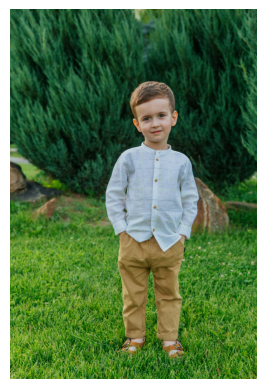

In [4]:
plt.imshow(im)
plt.axis('off')
plt.show()

In [5]:
# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [6]:
inputs = transforms(im, return_tensors="pt")

In [8]:
with torch.no_grad():
    logits = model(**inputs).logits

In [10]:
predicted_label = logits.softmax(1)
print(predicted_label)
result = predicted_label.argmax(1)
print(result)
print(model.config.id2label[result.item()])


# print(f"The image is classified as: {model.config.id2label[predicted_label]}")
# print(logits[0][predicted_label].item())

tensor([[0.0978, 0.8100, 0.0479, 0.0147, 0.0118, 0.0054, 0.0046, 0.0035, 0.0042]])
tensor([1])
3-9


In [14]:
result.item()

predicted_label[0, result.item()].item()

0.810049295425415

In [ ]:
# value_pred = round(logits[0][predicted_label].item(), 5)

# value_pred

3.85438

In [ ]:
# id2label = model.config.id2label
# output_dict = {}

# for idx, label in id2label.items():
#     output_dict[label] = f'{logits[0, int(idx)]:.5f}'

# print(output_dict)

{'0-2': '1.74054', '3-9': '3.85438', '10-19': '1.02661', '20-29': '-0.15235', '30-39': '-0.37852', '40-49': '-1.15774', '50-59': '-1.30978', '60-69': '-1.59891', 'more than 70': '-1.40191'}


In [ ]:
# Submit Method
assignment_id = "00_pipeline_and_gradio"
question_id = "01_image_classification_using_hugging_faces_model"
answer = "0.8100" # Put your answer here
submit(student_id, name, assignment_id, answer, question_id, drive_link)

'Assignment successfully submitted'

In [15]:
def classify_image(input_image: gr.Image) -> json:
    # Init model, transforms
    model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
    transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

    # Open image from Gradio interface
    im = Image.fromarray(input_image.astype('uint8'), 'RGB')

    # Transform image and pass it through the model
    inputs = transforms(im, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_label = logits.softmax(1)
    result = predicted_label.argmax(1)


    print(f"The image is classified as: {model.config.id2label[result.item()]}")
    print(predicted_label[0, result.item()].item())

    return {
        "score": predicted_label[0, result.item()].item(),
        "label": model.config.id2label[result.item()]
    }

## Pipeline and Gradio

**Task 2: Image Classification using Hugging Face's Model and Gradio**

In this second task, you will create a user-friendly interface using Gradio for your image classification pipeline that you created in Task 1. The difference with task 1 is, that in this task, you use **image files as input**, process them through the Hugging Face model, and display predictions output. The output displayed is **only the results with the highest `score`**.

Here are the key steps that you might be able to follow:

1. **Image Input:** Create a function to accept an image file as input. The image should be in a format that can be processed by the model.
2. **Model Loading and Prediction:** Load the model from Hugging Face's model hub and pass the image to the model to obtain the prediction. The model predicts the age of the person in the image.
3. **Gradio Interface:** Use Gradio to create a user-friendly interface for your application. The interface should allow users to upload an image file, and it should display the model's output in a clear and understandable manner.
4. **Interface Launch:** Launch the Gradio interface. Make sure that the interface is accessible and easy to use.

## Submisssion

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

You need to submit screenshot of your Gradio's app. In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

- You should upload a person's image to that app
- The score should be included at the screenshot


In [16]:
# @title #### 02. Image Classification using Hugging Face's Model and Gradio

# Put your code here:

import gradio as gr

iface = gr.Interface(fn=classify_image, inputs="image", outputs=gr.JSON())
iface.launch(debug=True)




# ---- End of your code ----

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://a39e2efab47faccb3d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


The image is classified as: 20-29
0.8634673953056335
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a39e2efab47faccb3d.gradio.live


Example of Expected Output:

![gradio-result](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/gradio-result.png)

In [18]:
# Submit Method
question_id = "02_image_classification_using_hugging_faces_model_and_gradio"
submit_image(student_id, question_id, '/content/Screenshot 2024-02-05 220717.png')


'Assignment successfully submitted'

In [ ]:
# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

# Transform our image and pass it through the model
inputs = transforms(im, return_tensors='pt')
output = model(**inputs)

# Predicted Class probabilities
proba = output.logits.softmax(1)

# Predicted Classes
preds = proba.argmax(1)

print(proba)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tensor([[0.0978, 0.8100, 0.0479, 0.0147, 0.0118, 0.0054, 0.0046, 0.0035, 0.0042]],
       grad_fn=<SoftmaxBackward0>)


> Note: If your submission for Task-2 did not run (After you run it never changes from "*" to a number), stop the Code block that's running the Gradio app, then the submission will run. To stop the Code block, you can click on the Code block and then click the stop button.